In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [215]:
df = pd.read_csv('refined_data.csv')
newdf = pd.read_csv('test_data.csv')

In [216]:
FTP_TP = round((df['Free_Throw']/df['Points']*100),2)
FTP_A = round((df['Away_Free_Throw']/df['Points']*100),2)

<bound method Axes.legend of <AxesSubplot:title={'center':'Points in a game from Free Throws'}, xlabel='%', ylabel='Points'>>

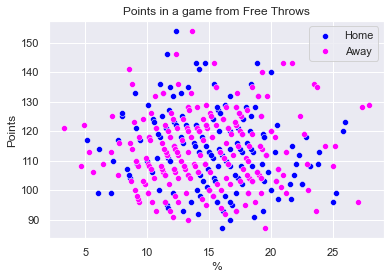

In [217]:
#How many % of points scored in a game are from Free Throw
#Away & Home don't really differ
bar1 = sns.scatterplot(y=df["Points"], x=FTP_TP.tail(200),color='blue',label='Home')
bar2 = sns.scatterplot(y=df["Points"], x=FTP_A.tail(200), color='magenta',label='Away')
bar1.set_title('Points in a game from Free Throws')
bar1.set_xlabel('%')
bar1.legend

In [218]:
twopt = round((df['2Point']/df['Points']*100),2)
away_twopt = round((df['Away_2Point']/df['Points']*100),2)

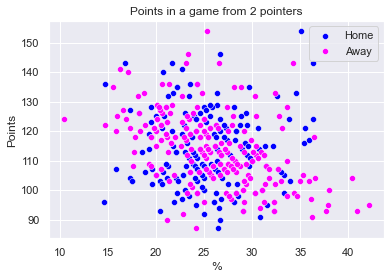

In [219]:
#How many % of points scored in a game are from 2 pointers
#Away & Home don't really differ
ax1 = sns.scatterplot(y=df["Points"], x=twopt.tail(200), color='Blue',label='Home')
ax2 = sns.scatterplot(y=df["Points"], x=away_twopt.tail(200), color='Magenta',label='Away')
ax1.set_title('Points in a game from 2 pointers')
ax1.set_xlabel('%')
ax1.legend()

In [220]:
threept = round((df['3Point']/df['Points']*100),2)
away_threept = round((df['Away_3Point']/df['Points']*100),2)

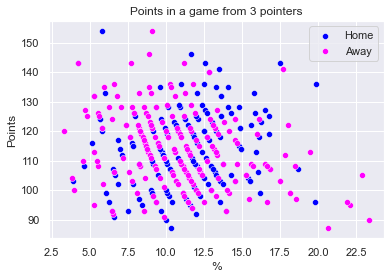

In [221]:
ax1 = sns.scatterplot(y=df["Points"], x=threept.tail(200), color='Blue',label='Home')
ax2 = sns.scatterplot(y=df["Points"], x=away_threept.tail(200), color='Magenta',label='Away')
ax1.set_title('Points in a game from 3 pointers')
ax1.set_xlabel('%')
ax1.legend()

In [222]:
newdf = newdf.iloc[: , 1:]

In [223]:
newdf.head()

,Team,FT_%,3pt_%,2pt_%,Free_Throw_%,Away_Free_Throw_%,3Point_%,Away_3Point_%,2Point_%,Away_2Point_%
0,BOS,79.632743,36.788496,52.755310,80.665487,78.600000,37.348673,36.228319,53.853097,51.657522
1,GSW,79.570621,36.541191,53.529329,80.015315,79.125926,36.867568,36.214815,54.621622,52.437037
2,CHO,76.707995,35.622310,50.591742,76.725000,76.690991,36.184259,35.060360,51.155556,50.027928
3,DET,75.182727,35.440455,51.125000,74.383636,75.981818,35.676364,35.204545,51.607273,50.642727
4,HOU,77.639381,34.654425,55.034071,76.683186,78.595575,34.069027,35.239823,55.056637,55.011504


In [224]:
df.head()

,Unnamed: 0,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,...,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency,ielo,away_ielo,Away_ielo
0,0,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,...,0.192,14,23,0.609,87,108.247423,100.000000,1500,1500,1500
1,1,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,...,0.270,24,37,0.649,100,113.684211,109.890110,1500,1500,1500
2,2,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,...,0.412,15,20,0.750,113,121.739130,132.941176,1500,1500,1500
3,3,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,...,0.185,15,22,0.682,100,111.956522,121.951220,1500,1500,1500
4,4,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,...,0.400,17,22,0.773,131,121.739130,133.673469,1500,1500,1500


In [225]:
#Missed Data, need to import function from data
#homestat & away stat for data cleaning
homestatlist = ['Field_Goal','Field_Goal_Attempts','Field_Goal_%','2Point','2Point_Attempts','2Point_%','3Point','3Point_Attempts','3Point_%','Free_Throw','Free_Throw_Attempt','Free_Throw_%','Points']
awaystatlist = ['Away_Field_Goal','Away_Field_Goal_Attempts','Away_Field_Goal_%','Away_2Point','Away_2Point_Attempts','Away_2Point_%','Away_3Point','Away_3Point_Attempts','Away_3Point_%','Away_Free_Throw','Away_Free_Throw_Attempt','Away_Free_Throw_%','Away_Points']
#Function to return team stat
def byTeam(string):
    x = df.loc[df['Home_Team']==string]
    x = x.drop(awaystatlist,axis=1)
    y = df.loc[df['Away_Team']==string]
    y = y.drop(homestatlist,axis=1)
    return pd.concat([x,y])
def pt(x):
    y = x['Points'].dropna().mean()
    return y
def away_pt(x):
    y = x['Away_Points'].dropna().mean()
    return y
pts = []
for x in newdf['Team']:
    pts.append(pt(byTeam(x)))
newdf['Points'] = pts
away_pts=[]
for x in newdf['Team']:
    away_pts.append(away_pt(byTeam(x)))
newdf['Away_Points'] = away_pts

In [226]:
newdf.head()

,Team,FT_%,3pt_%,2pt_%,Free_Throw_%,Away_Free_Throw_%,3Point_%,Away_3Point_%,2Point_%,Away_2Point_%,Points,Away_Points
0,BOS,79.632743,36.788496,52.755310,80.665487,78.600000,37.348673,36.228319,53.853097,51.657522,114.796460,110.938053
1,GSW,79.570621,36.541191,53.529329,80.015315,79.125926,36.867568,36.214815,54.621622,52.437037,114.153153,111.833333
2,CHO,76.707995,35.622310,50.591742,76.725000,76.690991,36.184259,35.060360,51.155556,50.027928,109.000000,107.000000
3,DET,75.182727,35.440455,51.125000,74.383636,75.981818,35.676364,35.204545,51.607273,50.642727,107.681818,106.245455
4,HOU,77.639381,34.654425,55.034071,76.683186,78.595575,34.069027,35.239823,55.056637,55.011504,113.876106,113.168142


In [227]:
BOS = df.loc[df['Away_Team']=='BOS']
BOS['Away_Points'].mean()

110.93805309734513

In [228]:
def offeff(x):
    y = x['Offensive_Efficiency'].dropna().mean()
    return y
def away_offeff(x):
    y = x['Away_Offensive_Efficiency'].dropna().mean()
    return y
off_eff = []
for x in newdf['Team']:
    off_eff.append(offeff(byTeam(x)))
newdf['O_Efficiency'] = off_eff
away_eff=[]
for x in newdf['Team']:
    away_eff.append(away_offeff(byTeam(x)))
newdf['Away_O_Effciency'] = away_eff

In [229]:
newdf.head()

,Team,FT_%,3pt_%,2pt_%,Free_Throw_%,Away_Free_Throw_%,3Point_%,Away_3Point_%,2Point_%,Away_2Point_%,Points,Away_Points,O_Efficiency,Away_O_Effciency
0,BOS,79.632743,36.788496,52.755310,80.665487,78.600000,37.348673,36.228319,53.853097,51.657522,114.796460,110.938053,126.981015,124.639550
1,GSW,79.570621,36.541191,53.529329,80.015315,79.125926,36.867568,36.214815,54.621622,52.437037,114.153153,111.833333,127.662062,126.366354
2,CHO,76.707995,35.622310,50.591742,76.725000,76.690991,36.184259,35.060360,51.155556,50.027928,109.000000,107.000000,126.397530,122.809652
3,DET,75.182727,35.440455,51.125000,74.383636,75.981818,35.676364,35.204545,51.607273,50.642727,107.681818,106.245455,128.027334,123.514793
4,HOU,77.639381,34.654425,55.034071,76.683186,78.595575,34.069027,35.239823,55.056637,55.011504,113.876106,113.168142,128.946667,127.356959


In [230]:
bargraph1 = newdf[['Team','FT_%']].groupby(['Team'])['FT_%'].mean().sort_values(ascending=False)

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Team', ylabel='Free_Throw_%'>

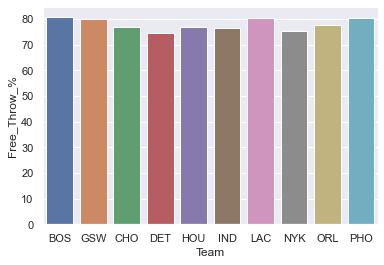

In [231]:
sns.barplot(newdf['Team'].head(10), newdf['Free_Throw_%'].head(10))

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FT_%'>

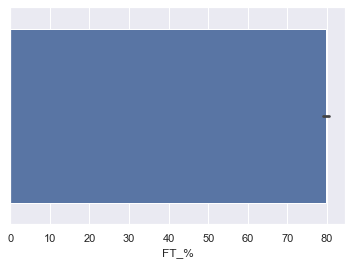

In [232]:
sns.barplot(bargraph1.head(10))

In [338]:
newdf['3Point_%'].head(10).mean()

36.28003226002021

Text(0.5, 1.0, 'Home Team Comparison')

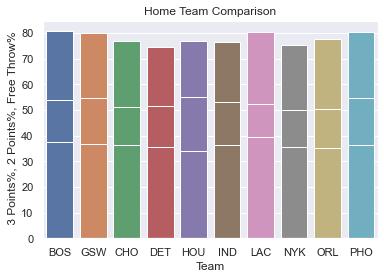

In [330]:
ax = sns.barplot(data=newdf, x=newdf['Team'].head(10), y=newdf['Free_Throw_%'])
sns.barplot(data=newdf, x=newdf['Team'].head(10), y=newdf['2Point_%'])
sns.barplot(data=newdf, x=newdf['Team'].head(10), y=newdf['3Point_%'])
ax.set_ylabel(' 3 Points%, 2 Points%, Free Throw%')
ax.set_title('Home Team Comparison')


Text(0.5, 1.0, 'Away Team Comparison')

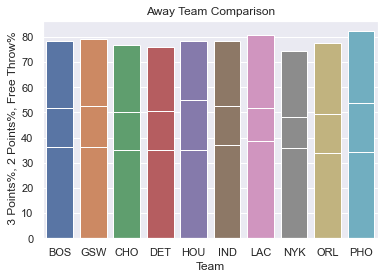

In [327]:
ax = sns.barplot(data=newdf, x=newdf['Team'].head(10), y=newdf['Away_Free_Throw_%'])
sns.barplot(data=newdf, x=newdf['Team'].head(10), y=newdf['Away_2Point_%'])
sns.barplot(data=newdf, x=newdf['Team'].head(10), y=newdf['Away_3Point_%'])
ax.set_ylabel(' 3 Points%, 2 Points%, Free Throw%')
ax.set_title('Away Team Comparison')



In [344]:
newdf['Away_2Point_%'].head(10).mean()

51.4976581770203

In [235]:
newdf.head(10)

,Team,FT_%,3pt_%,2pt_%,Free_Throw_%,Away_Free_Throw_%,3Point_%,Away_3Point_%,2Point_%,Away_2Point_%,Points,Away_Points,O_Efficiency,Away_O_Effciency
0,BOS,79.632743,36.788496,52.755310,80.665487,78.600000,37.348673,36.228319,53.853097,51.657522,114.796460,110.938053,126.981015,124.639550
1,GSW,79.570621,36.541191,53.529329,80.015315,79.125926,36.867568,36.214815,54.621622,52.437037,114.153153,111.833333,127.662062,126.366354
2,CHO,76.707995,35.622310,50.591742,76.725000,76.690991,36.184259,35.060360,51.155556,50.027928,109.000000,107.000000,126.397530,122.809652
3,DET,75.182727,35.440455,51.125000,74.383636,75.981818,35.676364,35.204545,51.607273,50.642727,107.681818,106.245455,128.027334,123.514793
4,HOU,77.639381,34.654425,55.034071,76.683186,78.595575,34.069027,35.239823,55.056637,55.011504,113.876106,113.168142,128.946667,127.356959
5,IND,77.409676,36.669954,52.866810,76.606195,78.213158,36.149558,37.190351,53.132743,52.600877,110.734513,110.833333,125.544387,123.212860
6,LAC,80.619912,38.974336,52.070354,80.335398,80.904425,39.441593,38.507080,52.457522,51.683186,117.159292,113.176991,128.743042,127.356414
7,NYK,74.955000,35.594545,48.955000,75.302727,74.607273,35.447273,35.741818,49.872727,48.037273,106.854545,104.636364,124.592606,122.536352
8,ORL,77.509585,34.668665,49.715345,77.534821,77.484348,35.364286,33.973043,50.209821,49.220870,107.053571,105.469565,123.152747,121.097314
9,PHO,81.396827,35.277664,54.067622,80.500862,82.292793,36.251724,34.303604,54.477586,53.657658,112.672414,111.162162,130.438186,127.454379


In [236]:
newdf['avg_points'] = (newdf['Points'] + newdf['Away_Points'])/2
newdf['o_eff']=(newdf['O_Efficiency']+newdf['Away_O_Effciency'])/2

In [237]:
newdf.head(10)

,Team,FT_%,3pt_%,2pt_%,Free_Throw_%,Away_Free_Throw_%,3Point_%,Away_3Point_%,2Point_%,Away_2Point_%,Points,Away_Points,O_Efficiency,Away_O_Effciency,avg_points,o_eff
0,BOS,79.632743,36.788496,52.755310,80.665487,78.600000,37.348673,36.228319,53.853097,51.657522,114.796460,110.938053,126.981015,124.639550,112.867257,125.810282
1,GSW,79.570621,36.541191,53.529329,80.015315,79.125926,36.867568,36.214815,54.621622,52.437037,114.153153,111.833333,127.662062,126.366354,112.993243,127.014208
2,CHO,76.707995,35.622310,50.591742,76.725000,76.690991,36.184259,35.060360,51.155556,50.027928,109.000000,107.000000,126.397530,122.809652,108.000000,124.603591
3,DET,75.182727,35.440455,51.125000,74.383636,75.981818,35.676364,35.204545,51.607273,50.642727,107.681818,106.245455,128.027334,123.514793,106.963636,125.771063
4,HOU,77.639381,34.654425,55.034071,76.683186,78.595575,34.069027,35.239823,55.056637,55.011504,113.876106,113.168142,128.946667,127.356959,113.522124,128.151813
5,IND,77.409676,36.669954,52.866810,76.606195,78.213158,36.149558,37.190351,53.132743,52.600877,110.734513,110.833333,125.544387,123.212860,110.783923,124.378623
6,LAC,80.619912,38.974336,52.070354,80.335398,80.904425,39.441593,38.507080,52.457522,51.683186,117.159292,113.176991,128.743042,127.356414,115.168142,128.049728
7,NYK,74.955000,35.594545,48.955000,75.302727,74.607273,35.447273,35.741818,49.872727,48.037273,106.854545,104.636364,124.592606,122.536352,105.745455,123.564479
8,ORL,77.509585,34.668665,49.715345,77.534821,77.484348,35.364286,33.973043,50.209821,49.220870,107.053571,105.469565,123.152747,121.097314,106.261568,122.125031
9,PHO,81.396827,35.277664,54.067622,80.500862,82.292793,36.251724,34.303604,54.477586,53.657658,112.672414,111.162162,130.438186,127.454379,111.917288,128.946282


In [319]:
df.to_csv('Final_Data.csv')
newdf.to_csv('Final_Data_byTeam.csv')

In [239]:
df.head()

,Unnamed: 0,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,...,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency,ielo,away_ielo,Away_ielo
0,0,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,...,0.192,14,23,0.609,87,108.247423,100.000000,1500,1500,1500
1,1,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,...,0.270,24,37,0.649,100,113.684211,109.890110,1500,1500,1500
2,2,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,...,0.412,15,20,0.750,113,121.739130,132.941176,1500,1500,1500
3,3,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,...,0.185,15,22,0.682,100,111.956522,121.951220,1500,1500,1500
4,4,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,...,0.400,17,22,0.773,131,121.739130,133.673469,1500,1500,1500


In [240]:
df['Point_Diff'] = df['Points'] - df['Away_Points']

In [255]:
np.log10(df['Point_Diff'])

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       1.255273
1       0.903090
2            NaN
3       0.477121
4            NaN
          ...   
3364    1.204120
3365         NaN
3366         NaN
3367         NaN
3368    0.698970
Name: Point_Diff, Length: 3369, dtype: float64

Text(0.5, 1.0, 'Point Differences in Games')

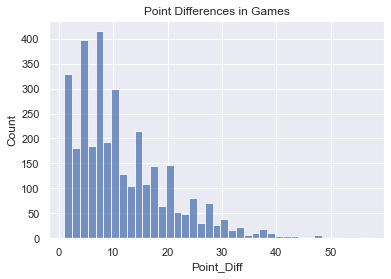

In [280]:
sns.set()
#ax = sns.countplot(np.abs(df['Point_Diff']))
ax = sns.histplot(np.abs(df['Point_Diff']))
ax.set_title('Point Differences in Games')

In [283]:
df = df.drop(['ielo','away_ielo','Away_ielo'],axis=1)

In [284]:
df.head()

,Unnamed: 0,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,...,Away_3Point,Away_3Point_Attempts,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency,Point_Diff
0,0,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,...,5,26,0.192,14,23,0.609,87,108.247423,100.000000,18
1,1,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,...,10,37,0.270,24,37,0.649,100,113.684211,109.890110,8
2,2,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,...,14,34,0.412,15,20,0.750,113,121.739130,132.941176,-1
3,3,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,...,5,27,0.185,15,22,0.682,100,111.956522,121.951220,3
4,4,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,...,10,25,0.400,17,22,0.773,131,121.739130,133.673469,-19


In [285]:
df['O_Eff_Per_Points'] = df['Offensive_Efficiency'] / df['Points']

Text(0.5, 1.0, 'Offense Efficiency Per Point at Home')

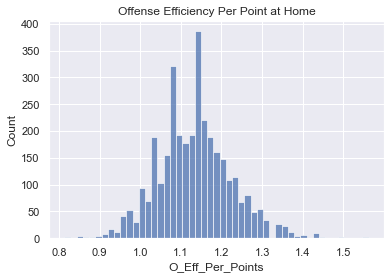

In [293]:
#Home OffEff/Point
sns.set()
ax = sns.histplot(df['O_Eff_Per_Points'])
ax.set_title('Offense Efficiency Per Point at Home')

In [291]:
df['Away_O_Eff_Per_Points'] = df['Away_Offensive_Efficiency'] / df['Away_Points']

Text(0.5, 1.0, 'Offense Efficiency Per Point Away')

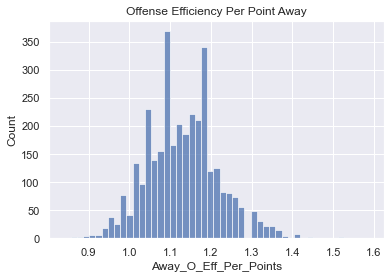

In [345]:
#Away OffEff/Point
sns.set()
ax = sns.histplot(df['Away_O_Eff_Per_Points'])
ax.set_title('Offense Efficiency Per Point Away')

In [296]:
from sklearn.preprocessing import OneHotEncoder

In [301]:
newdf['Team']

0     BOS
1     GSW
2     CHO
3     DET
4     HOU
5     IND
6     LAC
7     NYK
8     ORL
9     PHO
10    SAC
11    SAS
12    TOR
13    PHI
14    POR
15    WAS
16    BRK
17    MEM
18    MIL
19    MIN
20    NOP
21    UTA
22    CHI
23    DAL
24    DEN
25    LAL
26    MIA
27    CLE
28    OKC
29    ATL
Name: Team, dtype: object

In [303]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['BOS', 0], ['GSW', 1], ['CHO', 2],['DET',3],['HOU',4],['IND',5],['LAC',6],['NYK',7],['ORL',8],['PHO',9],['SAC',10],['SAS',11],['TOR',12],['PHI',13],['POR',14],['WAS',15],['BRK',16],['MEM',17],['MIL',18],['MIN',19],['NOP',20],['UTA',21],['CHI',22],['DAL',23],['DEN',24],['LAL',25],['MIA',26],['CLE',27],['OKC',28],['ATL',29]]
enc.fit(X)
OneHotEncoder(handle_unknown='ignore')
enc.categories_

[array(['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET',
        'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
        'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
        'TOR', 'UTA', 'WAS'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=object)]

In [307]:
enc.transform([['BOS', 0], ['GSW', 1], ['CHO', 2],['DET',3],['HOU',4],['IND',5],['LAC',6],['NYK',7],['ORL',8],['PHO',9],['SAC',10],['SAS',11],['TOR',12],['PHI',13],['POR',14],['WAS',15],['BRK',16],['MEM',17],['MIL',18],['MIN',19],['NOP',20],['UTA',21],['CHI',22],['DAL',23],['DEN',24],['LAL',25],['MIA',26],['CLE',27],['OKC',28],['ATL',29]]
).toarray()


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [314]:
teams = pd.get_dummies(df[['Home_Team','Away_Team']])

In [317]:
df = pd.concat([teams,df],1)

/var/folders/x3/jv8gc_ln2_qgkg2mcy722mlh0000gn/T/ipykernel_8269/2095405361.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([teams,df],1)


In [318]:
df.head()

,Home_Team_ATL,Home_Team_BOS,Home_Team_BRK,Home_Team_CHI,Home_Team_CHO,Home_Team_CLE,Home_Team_DAL,Home_Team_DEN,Home_Team_DET,Home_Team_GSW,...,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points,Offensive_Efficiency,Away_Offensive_Efficiency,Point_Diff,O_Eff_Per_Points,Away_O_Eff_Per_Points
0,0,1,0,0,0,0,0,0,0,0,...,0.192,14,23,0.609,87,108.247423,100.000000,18,1.030928,1.149425
1,0,0,0,0,0,0,0,0,0,1,...,0.270,24,37,0.649,100,113.684211,109.890110,8,1.052632,1.098901
2,0,0,0,0,1,0,0,0,0,0,...,0.412,15,20,0.750,113,121.739130,132.941176,-1,1.086957,1.176471
3,0,0,0,0,0,0,0,0,1,0,...,0.185,15,22,0.682,100,111.956522,121.951220,3,1.086957,1.219512
4,0,0,0,0,0,0,0,0,0,0,...,0.400,17,22,0.773,131,121.739130,133.673469,-19,1.086957,1.020408
